(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)
Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_90 (Conv2D)              (None, 256, 256, 64) 640         input_13[0][0]                   
__________________________________________________________________________________________________
conv2d_91 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_90[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_37 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_91[0][0]                  
____________

8/8 [==============================] - 354s 44s/step - loss: 20.1026 - dice_coef: 0.3223 - val_loss: 0.6913 - val_dice_coef: 0.3324
Epoch 2/2
8/8 [==============================] - 328s 41s/step - loss: 0.6905 - dice_coef: 0.3185 - val_loss: 0.6895 - val_dice_coef: 0.3320


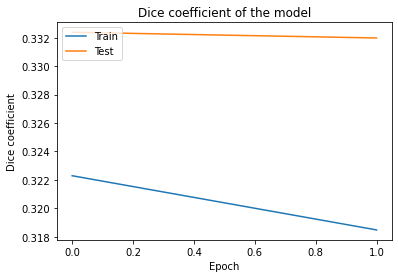

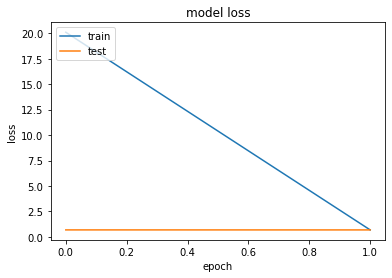

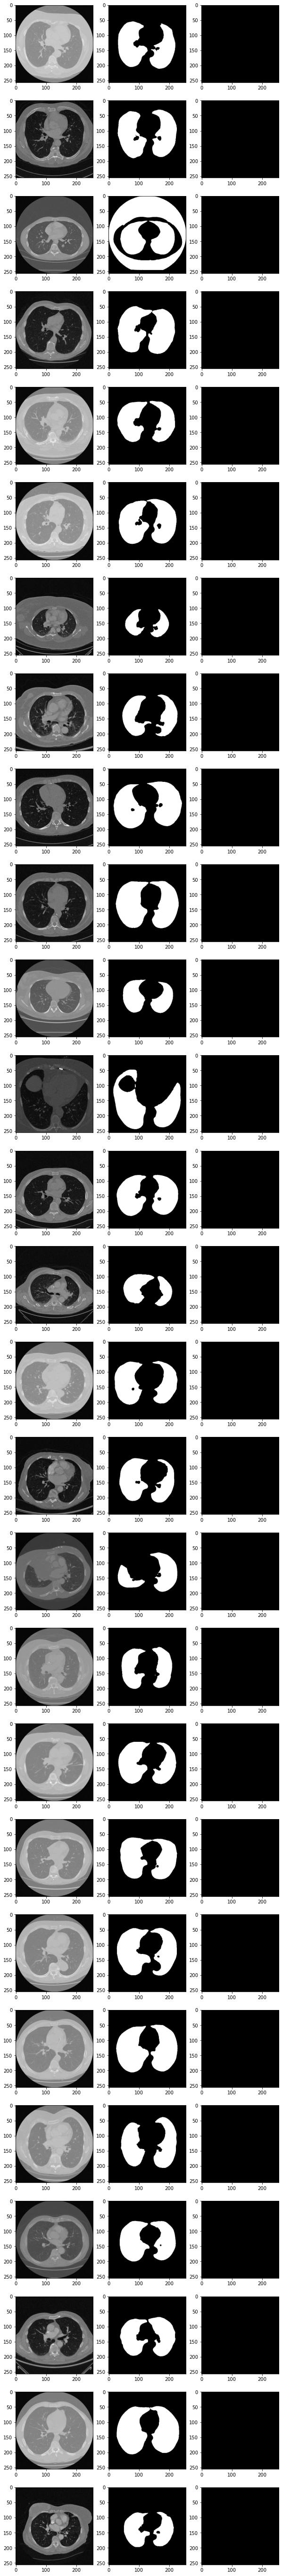

In [28]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D, Lambda, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model, load_model
from keras import backend as K
from keras.optimizers import *
from util import *
from model import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
import os

#Load data
x_train = np.load('dataset/x_train.npy')
y_train = np.load('dataset/y_train.npy')
x_val = np.load('dataset/x_val.npy')
y_val = np.load('dataset/y_val.npy')
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

#Select one of the following models
model=shallow_CNN(Inpute_shape=(256,256,1))
#model = unet(input_size = (256,256,1))
model.summary()

#Train your model
file_name= os.getcwd()
RL=ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, verbose=1, mode='auto', min_lr=1e-05)
#mcp_save = ModelCheckpoint(file_name, save_best_only=True, monitor='val_loss', mode='min')
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2, batch_size=32, callbacks=[RL])#,mcp_save])

#plot model performance
#plot Dice coefficient of the model
Destination_path = os.getcwd() 
plt.figure()
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('Dice coefficient of the model')
plt.ylabel('Dice coefficient')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.legend(['Train','Test'], loc='upper left')
plt.savefig(Destination_path + '\\'+'Dice_coeficient.jpg', dpi=500)
#plot loss function of the model
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(Destination_path+ '\\'+'loss.jpg', dpi=500) 

#Make prediction and plot the prediction results
preds = model.predict(x_val)
fig, ax = plt.subplots(len(x_val), 3, figsize=(10, 100))
for i, pred in enumerate(preds):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')

